# Proyek Akhir: Menyelesaikan Permasalahan Institusi Pendidikan

- Nama: Endah Rakhmawati
- Email: endahen12@gmail.com
- Id Dicoding: endah_ndahen

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold

from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, precision_score,
                            recall_score, f1_score)

import warnings
warnings.filterwarnings('ignore')

### Menyiapkan data yang akan diguankan

## Data Understanding

In [2]:
dataset = pd.read_csv('data.csv', sep=';')
dataset = dataset.sort_index()
dataset.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
dataset.shape

(4424, 37)

In [4]:
dataset.isnull().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


In [5]:
# Melihat baris nilai yang duplikat
duplicate = dataset[dataset.duplicated()]
duplicate

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status


In [6]:
# Menghapus baris yang duplikat, pertahankan baris pertama saja.
#df.drop_duplicates(keep='first', inplace=True)

In [7]:
# Menghitung values label Status
dataset['Status'].value_counts(dropna=False)

,count
Status,
Graduate,2209
Dropout,1421
Enrolled,794


In [8]:
dataset.dtypes

,0
Marital_status,int64
Application_mode,int64
Application_order,int64
Course,int64
Daytime_evening_attendance,int64
Previous_qualification,int64
Previous_qualification_grade,float64
Nacionality,int64
Mothers_qualification,int64
Fathers_qualification,int64


In [9]:
# Mengubah tipe data numerik menjadi object
dataset[['Marital_status', 'Application_mode', 'Application_order', 'Course', 'Daytime_evening_attendance', \
     'Previous_qualification', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification', \
     'Mothers_occupation', 'Fathers_occupation', 'Displaced', 'Educational_special_needs', 'Debtor', \
     'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International']] \
= dataset[['Marital_status', 'Application_mode', 'Application_order', 'Course', 'Daytime_evening_attendance', \
     'Previous_qualification', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification', \
     'Mothers_occupation', 'Fathers_occupation', 'Displaced', 'Educational_special_needs', 'Debtor', \
     'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International']].astype(str)

In [10]:
dataset.dtypes

,0
Marital_status,object
Application_mode,object
Application_order,object
Course,object
Daytime_evening_attendance,object
Previous_qualification,object
Previous_qualification_grade,float64
Nacionality,object
Mothers_qualification,object
Fathers_qualification,object


In [11]:
dataset.describe(include='all')

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424,4424,4424,4424,4424,4424,4424.000000,4424,4424,4424,4424,4424,4424.000000,4424,4424,4424,4424,4424,4424,4424.000000,4424,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,6,18,8,17,2,17,NaN,21,29,34,32,46,NaN,2,2,2,2,2,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,1,1,1,9500,1,1,NaN,1,1,37,9,9,NaN,1,0,0,1,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,3919,1708,3026,766,3941,3717,NaN,4314,1069,1209,1577,1010,NaN,2426,4373,3921,3896,2868,3325,NaN,4314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,NaN,NaN,NaN,NaN,NaN,NaN,132.613314,NaN,NaN,NaN,NaN,NaN,126.978119,NaN,NaN,NaN,NaN,NaN,NaN,23.265145,NaN,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,13.188332,NaN,NaN,NaN,NaN,NaN,14.482001,NaN,NaN,NaN,NaN,NaN,NaN,7.587816,NaN,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,95.000000,NaN,NaN,NaN,NaN,NaN,95.000000,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,125.000000,NaN,NaN,NaN,NaN,NaN,117.900000,NaN,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,133.100000,NaN,NaN,NaN,NaN,NaN,126.100000,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,140.000000,NaN,NaN,NaN,NaN,NaN,134.800000,NaN,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


In [12]:
# Membuat dataframe baru yang berisi Status Enrolled yang digunakan sebagai dataset prediksi
predict_df = dataset.loc[dataset['Status']=='Enrolled']
predict_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
16,1,18,1,9238,1,1,137.0,1,19,38,5,8,137.4,1,0,0,1,0,0,18,0,0,6,10,1,12.000000,0,0,6,14,2,11.000,0,10.8,1.4,1.74,Enrolled
19,1,1,1,9853,1,1,140.0,1,19,19,7,7,124.6,1,0,0,1,0,0,18,0,0,7,7,6,11.666667,0,0,7,8,6,13.500,0,16.2,0.3,-0.92,Enrolled
21,1,18,4,9556,1,1,127.0,1,1,38,4,7,121.8,1,0,0,1,0,0,20,0,0,7,14,7,11.437500,0,0,8,9,8,11.425,0,12.7,3.7,-1.70,Enrolled
25,1,1,1,9238,1,1,151.0,1,19,38,9,9,157.0,1,0,1,1,0,1,18,0,0,6,8,5,11.600000,0,0,6,12,4,11.000,0,7.6,2.6,0.32,Enrolled
27,1,1,1,9085,1,1,138.0,1,19,19,3,3,131.0,1,0,0,1,0,0,18,0,0,5,9,5,12.666667,2,0,5,7,4,13.000,0,9.4,-0.8,-3.12,Enrolled


In [13]:
predict_df.shape

(794, 37)

In [14]:
# Membuat dataframe baru yang berisi baris Status Dropout dan Graduate yang digunakan sebagai dataset pemodelan
df = dataset[(dataset['Status']=='Dropout') | (dataset['Status']=='Graduate')]
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [15]:
df.shape

(3630, 37)

In [16]:
# Untuk reproducibility
from numpy.random import seed
seed(100)

## Data Preparation / Preprocessing

In [17]:
# Membagi kolom numerik dan kategori
var_kategori = [var for var in df.columns if df[var].dtype=='O' and var not in ['Status']]
var_numerik = [var for var in df.columns if df[var].dtype!='O' and var not in ['Status']]

# Melihat pemisahan variabel
print("Kategori : ",var_kategori)
print("Numerik : ",var_numerik)

Kategori :  ['Marital_status', 'Application_mode', 'Application_order', 'Course', 'Daytime_evening_attendance', 'Previous_qualification', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International']
Numerik :  ['Previous_qualification_grade', 'Admission_grade', 'Age_at_enrollment', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate', 'Inflation_rate', 'GDP']


**Distribusi Variabel Kategori**

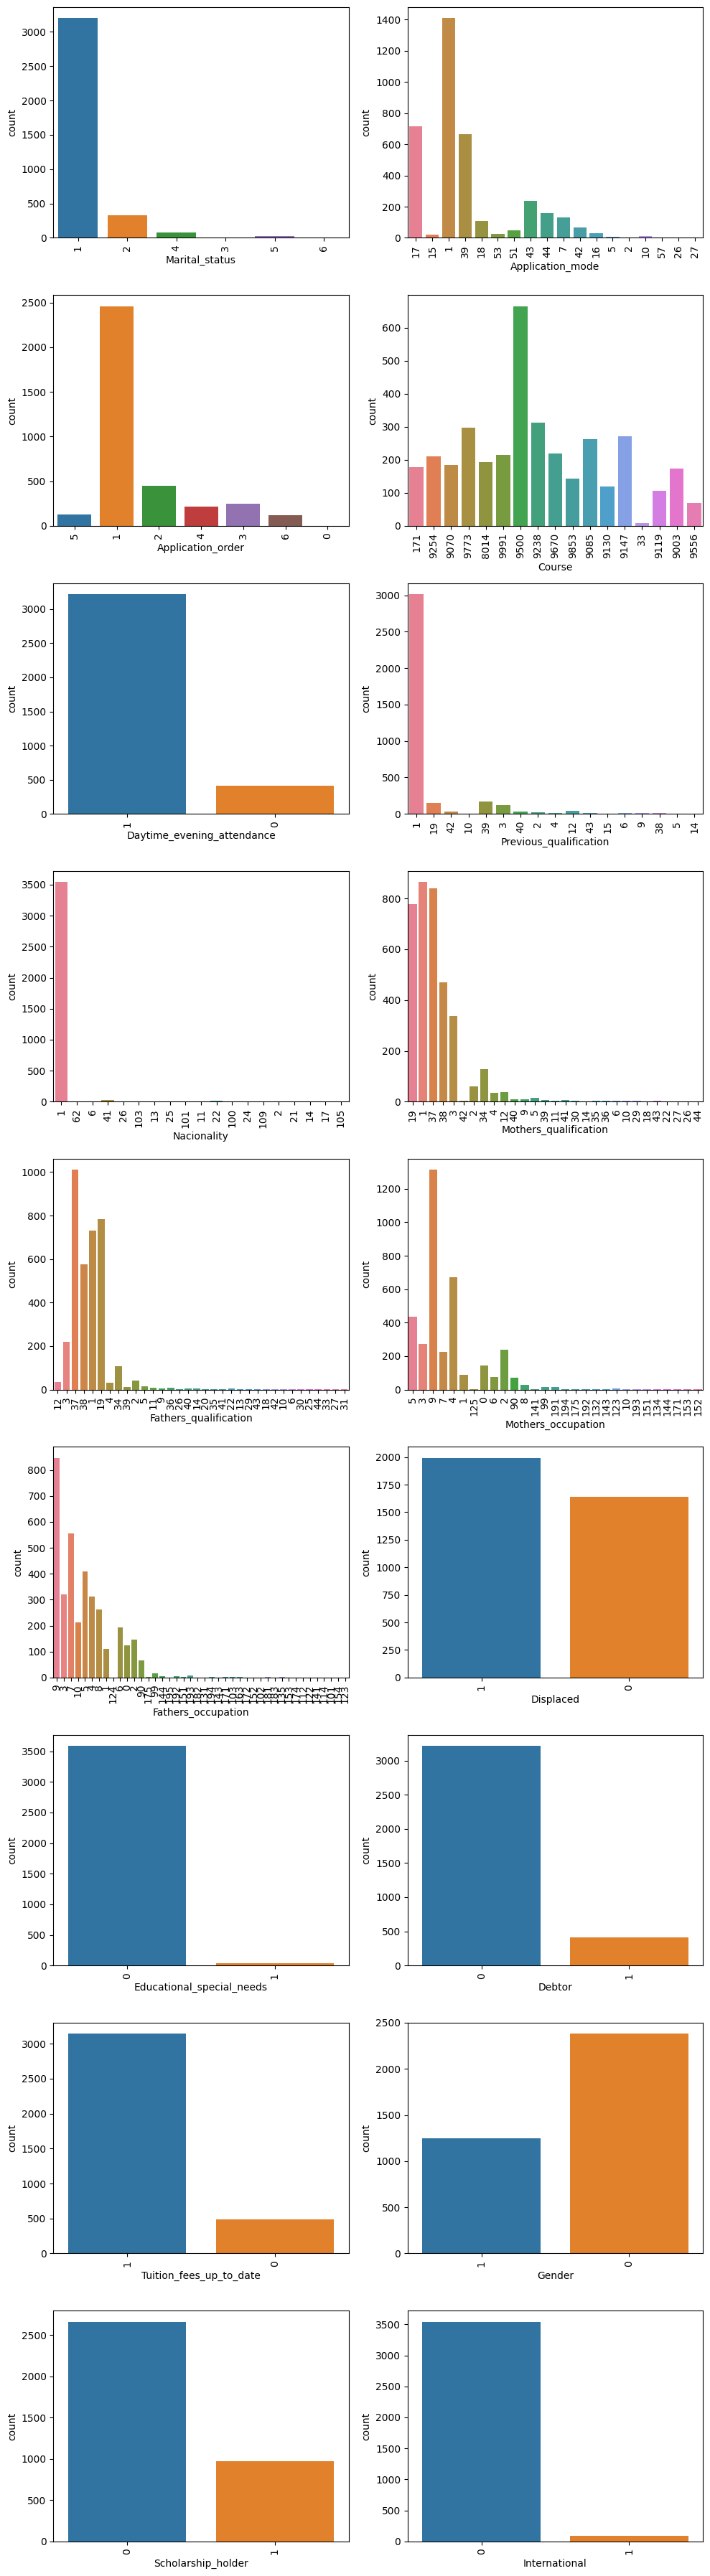

In [18]:
# Distribusi variabel kategori
fig, axs = plt.subplots(9, 2, figsize=(10, 36))
axs = axs.flatten()
for i, col in enumerate(var_kategori):
    sns.countplot(x=col, data=df, ax=axs[i], hue=col)
    axs[i].tick_params(axis='x', rotation=90)
    #axs[i].set_title(f"{col} Distribution")
#axs[-1].axis('off')
plt.tight_layout()
plt.show()

**Distribusi Variabel Numerik**

In [19]:
# Distribusi variabel numerik dengan histogram dan boxplot
def cek_plot(dataset, kolom):
    fig,ax = plt.subplots(1,2, figsize=(12, 4))

    # Histogram
    sns.distplot(dataset[kolom], bins=30, ax=ax[0])

    # Hitung mean and median
    mean_value = dataset[kolom].mean()
    median_value = dataset[kolom].median()

    # Garis vertikal mean and median
    ax[0].axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    ax[0].axvline(median_value, color='green', linestyle='-', label=f'Median: {median_value:.2f}')
    ax[0].set_title('Histogram')
    ax[0].legend()

    # Boxplot
    sns.boxplot(y=dataset[kolom], ax=ax[1])
    ax[1].set_title('Boxplot')

    # Judul utama
    fig.suptitle('Analisis variabel ' + str(kolom))

    # Menampilkan gambar
    plt.show()

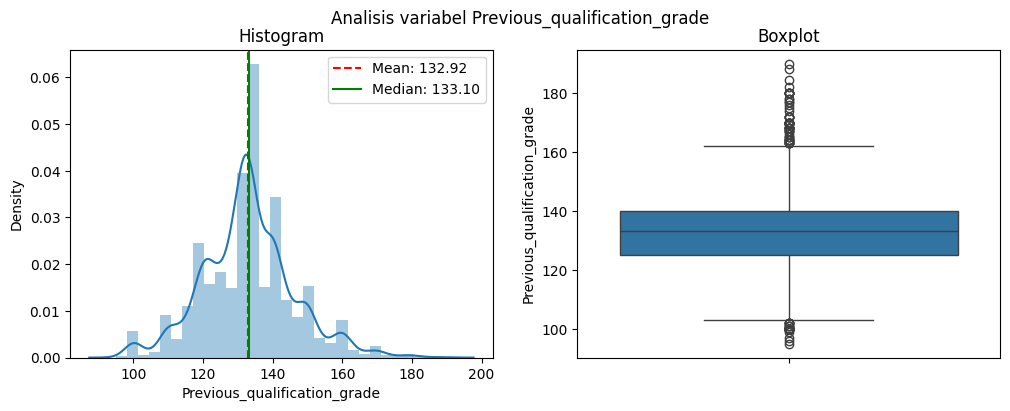

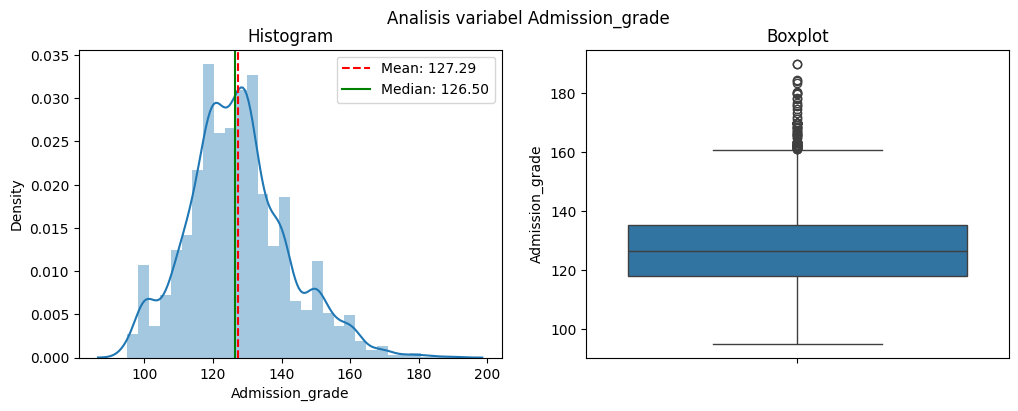

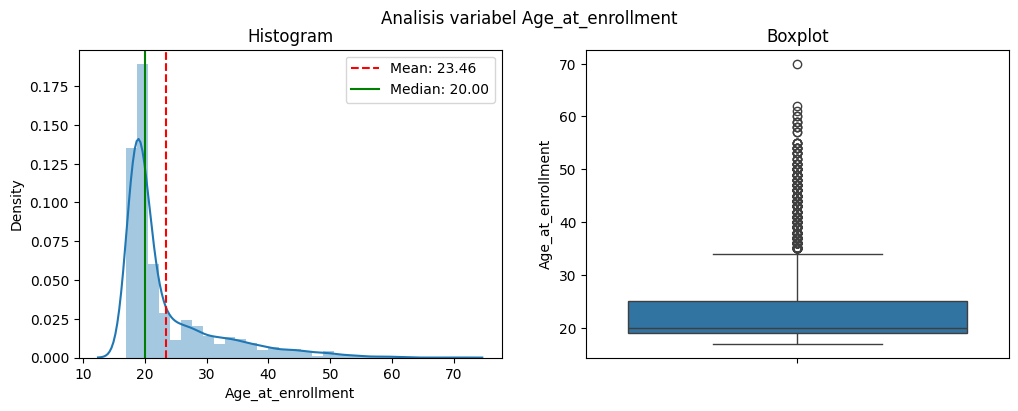

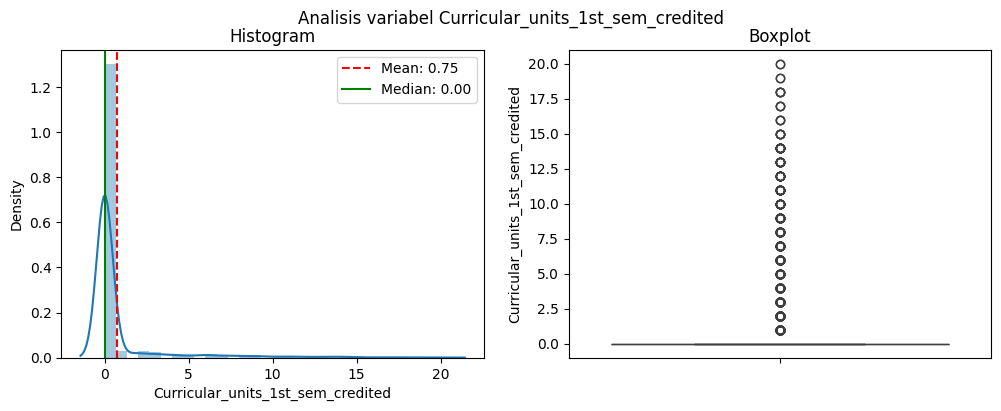

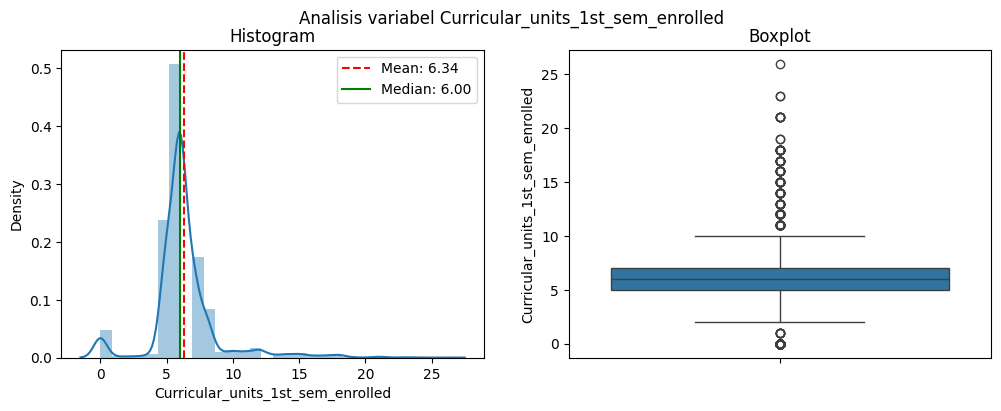

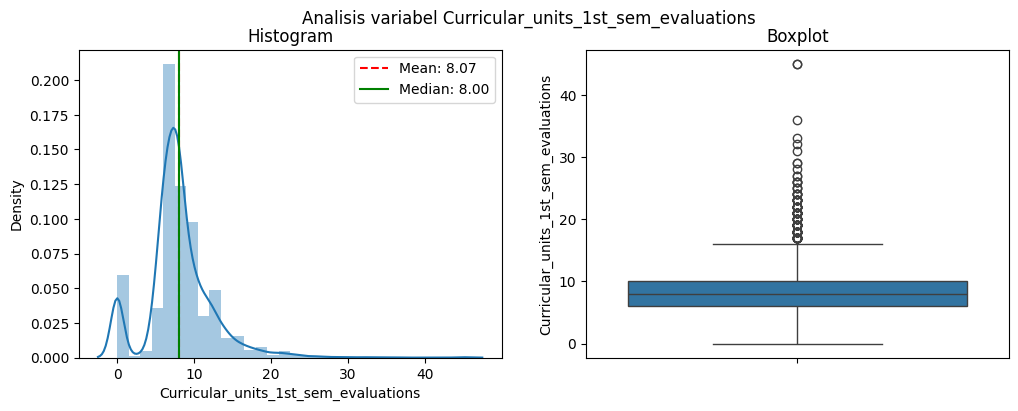

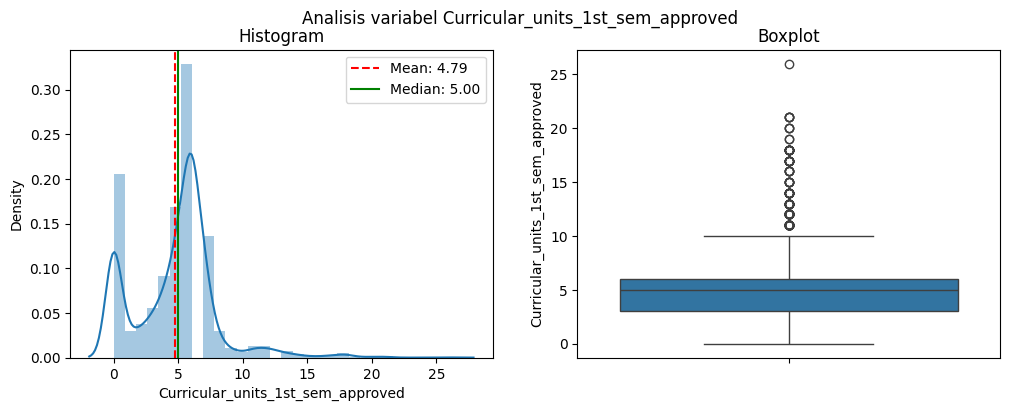

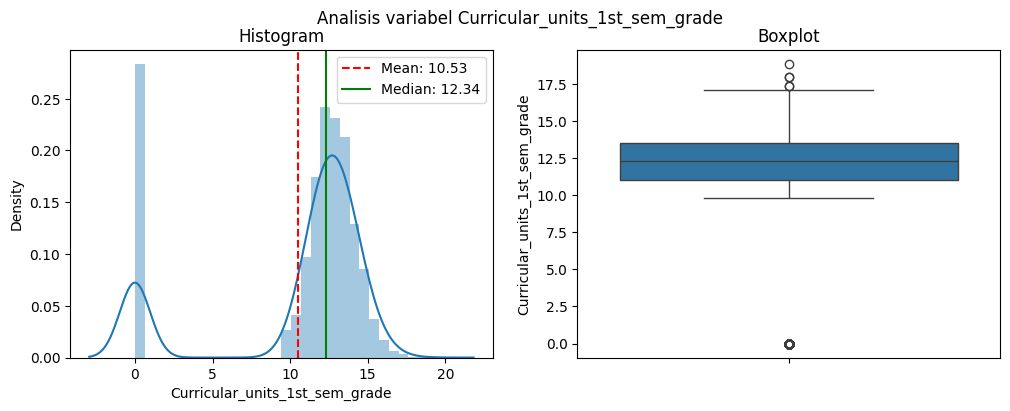

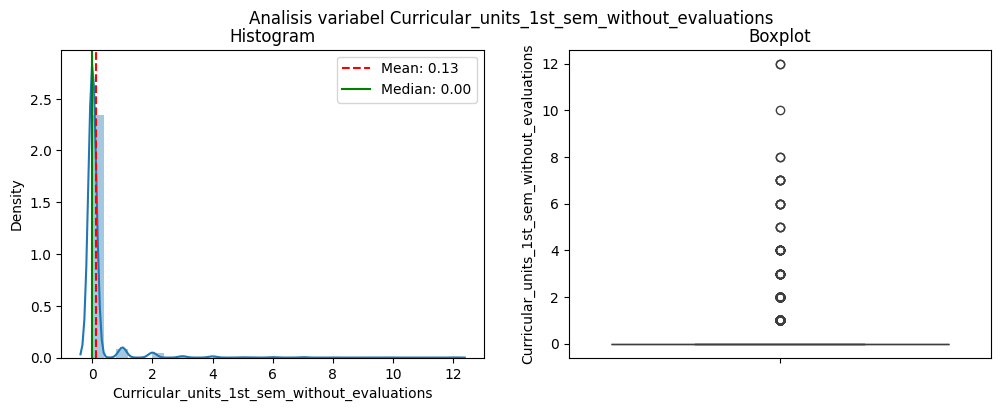

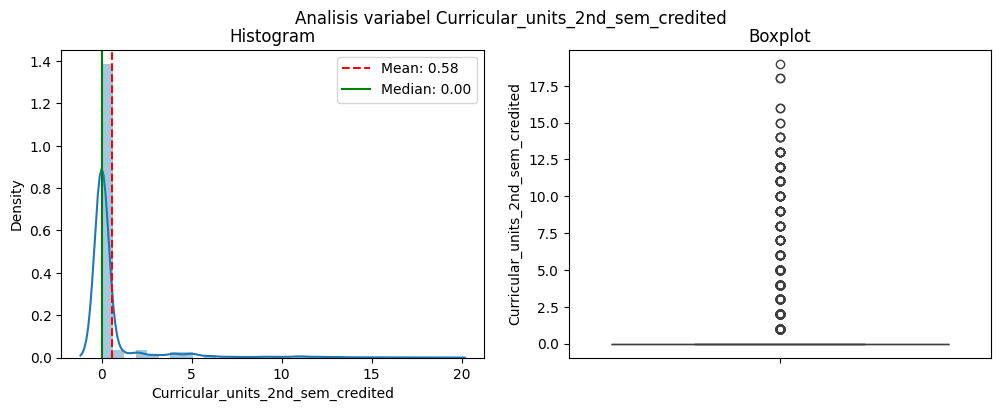

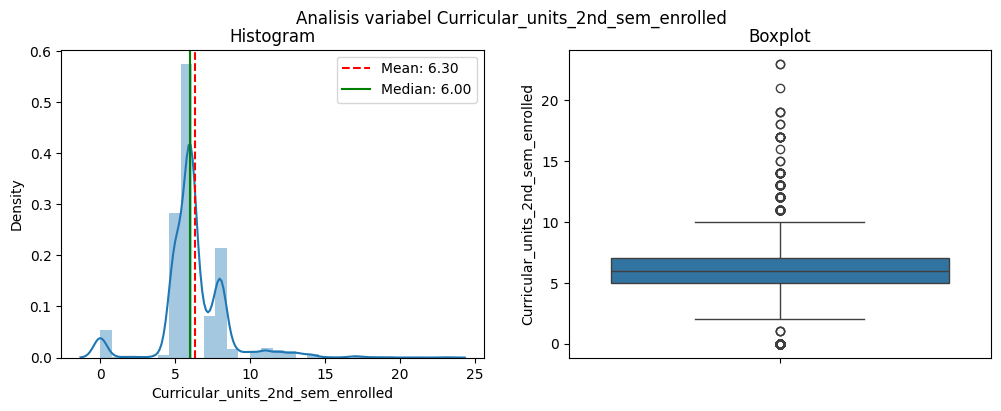

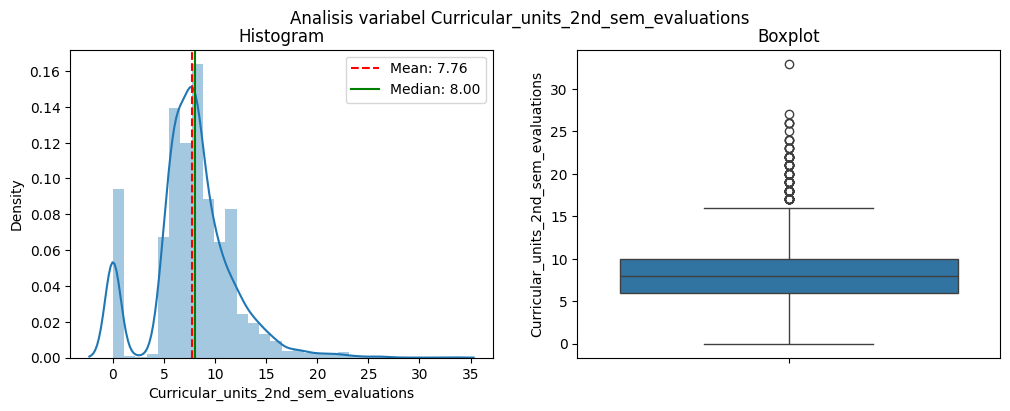

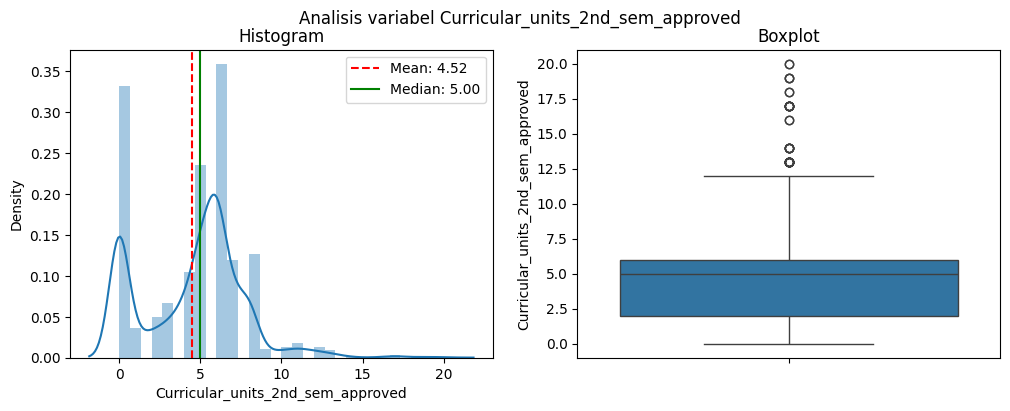

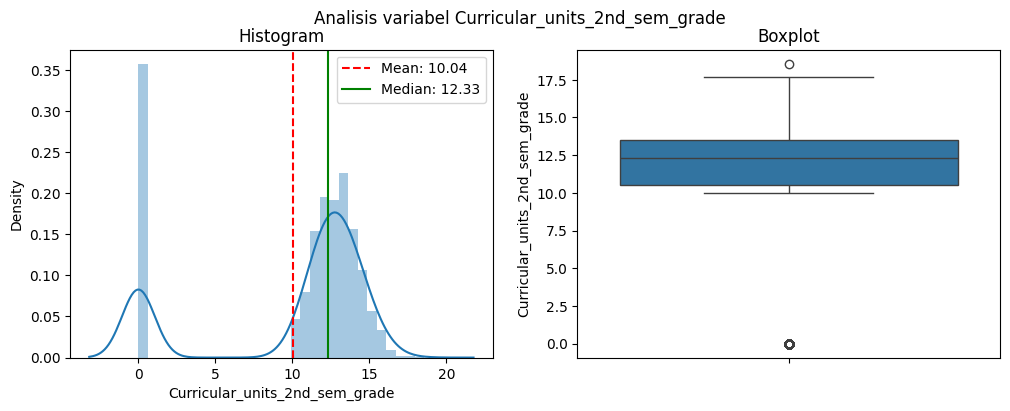

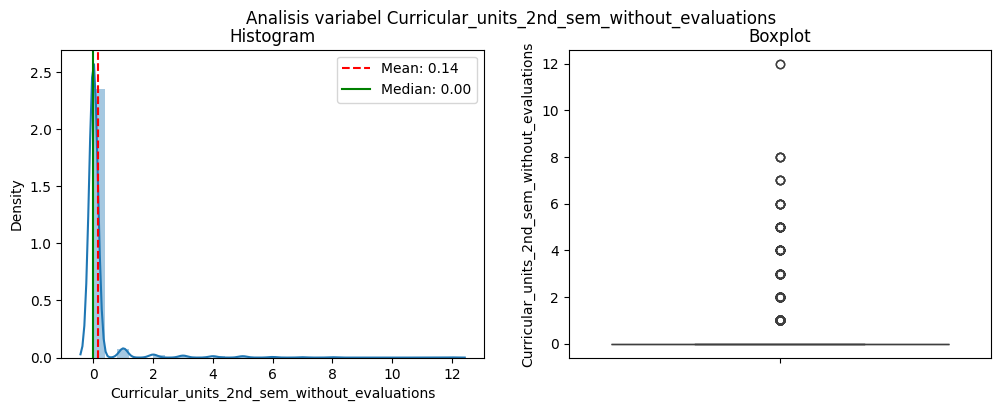

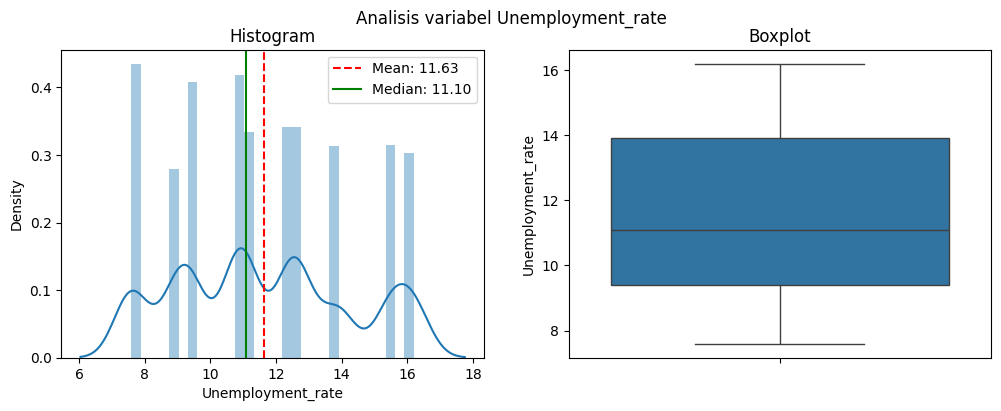

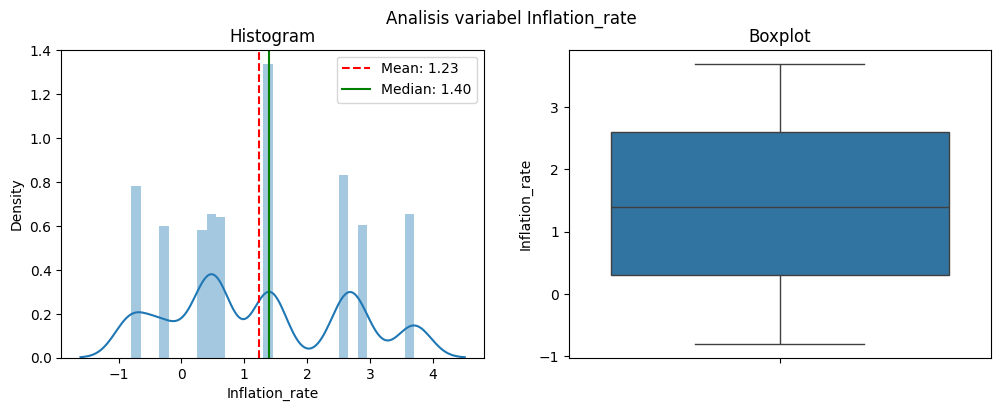

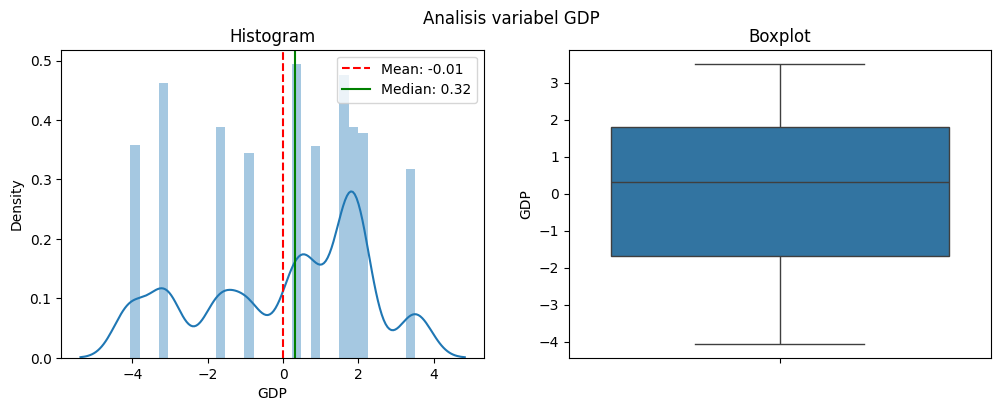

In [20]:
for column in df[var_numerik]:
    cek_plot(df, column)

**Label Encoding**

In [21]:
encoding_kat = ['Application_mode', 'Course', 'Previous_qualification', 'Nacionality', 'Mothers_qualification', \
                'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Status']

In [22]:
label_encoder = LabelEncoder()
for column in encoding_kat:
    df[column] = label_encoder.fit_transform(df[column])

df_encoded = pd.DataFrame(df, columns=df.columns)

In [23]:
df_encoded.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,4,5,0,1,0,122.0,0,6,3,22,39,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,2,1,10,1,0,160.0,0,0,15,20,33,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,0,5,4,1,0,122.0,0,17,22,26,39,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,4,2,14,1,0,122.0,0,18,22,22,33,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,9,1,2,0,0,100.0,0,17,23,26,39,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [24]:
df_encoded.shape

(3630, 37)

**Outlier Handling**

In [25]:
# Fungsi mendeteksi normal atau skewed
def split_norm_skew_test(data):
    # Membuat data frame dengan nama kolom: feature, skewness, distribution
    global distribution_df
    distribution_df = pd.DataFrame(columns=['feature', 'skewness', 'distribution'])
    for i in range(len(data.columns)):
        if data[data.columns[i]].skew() > -0.5 and data[data.columns[i]].skew() < 0.5:
            distribution_df.loc[i] = [data.columns[i], data[data.columns[i]].skew(), 'normal']
        else:
            distribution_df.loc[i] = [data.columns[i], data[data.columns[i]].skew(), 'skewed']
    print('Membuat tabel "distribution_df"')


# Menjalankan fungsinya
split_norm_skew_test(df_encoded[var_numerik])

Membuat tabel "distribution_df"


In [26]:
distribution_df.sort_values(by=['distribution'])

,feature,skewness,distribution
0,Previous_qualification_grade,0.287623,normal
15,Unemployment_rate,0.189502,normal
12,Curricular_units_2nd_sem_approved,0.268199,normal
11,Curricular_units_2nd_sem_evaluations,0.378069,normal
16,Inflation_rate,0.267055,normal
17,GDP,-0.390805,normal
6,Curricular_units_1st_sem_approved,0.754178,skewed
7,Curricular_units_1st_sem_grade,-1.451853,skewed
4,Curricular_units_1st_sem_enrolled,1.651648,skewed
9,Curricular_units_2nd_sem_credited,4.494329,skewed


In [27]:
list_skewed = distribution_df.query("distribution=='skewed'")['feature'].to_list()
list_skewed

['Admission_grade',
 'Age_at_enrollment',
 'Curricular_units_1st_sem_credited',
 'Curricular_units_1st_sem_enrolled',
 'Curricular_units_1st_sem_evaluations',
 'Curricular_units_1st_sem_approved',
 'Curricular_units_1st_sem_grade',
 'Curricular_units_1st_sem_without_evaluations',
 'Curricular_units_2nd_sem_credited',
 'Curricular_units_2nd_sem_enrolled',
 'Curricular_units_2nd_sem_grade',
 'Curricular_units_2nd_sem_without_evaluations']

In [28]:
# Mendeteksi batasan outlier untuk data berdistribusi skewed (Persentil 25 - 1.5*IQR) dan (Persentil 75 + 1.5*IQR)
def outlier_skewed(data, jarak):

    global outliers_skewed
    outliers_skewed = pd.DataFrame(columns=['feature_skewed', 'batas atas', 'batas bawah'])

    for i in range(len(data.columns)):
        # Mendefinisikan IQR
        IQR = data[data.columns[i]].quantile(0.75) - data[data.columns[i]].quantile(0.25)

        # Mendefinisikan batas_bawah dan batas_atas
        bawah = data[data.columns[i]].quantile(0.25) - (IQR * jarak)
        atas = data[data.columns[i]].quantile(0.75) + (IQR * jarak)

        outliers_skewed.loc[i] = [data.columns[i], atas, bawah]

    print('Membuat tabel "outliers_skewed"')

In [29]:
outlier_skewed(df_encoded[list_skewed], 1.5) #['Admission_grade', 'Age_at_enrollment']

Membuat tabel "outliers_skewed"


In [30]:
outliers_skewed

,feature_skewed,batas atas,batas bawah
0,Admission_grade,160.750000,92.350000
1,Age_at_enrollment,34.000000,10.000000
2,Curricular_units_1st_sem_credited,0.000000,0.000000
3,Curricular_units_1st_sem_enrolled,10.000000,2.000000
4,Curricular_units_1st_sem_evaluations,16.000000,0.000000
5,Curricular_units_1st_sem_approved,10.500000,-1.500000
6,Curricular_units_1st_sem_grade,17.250000,7.250000
7,Curricular_units_1st_sem_without_evaluations,0.000000,0.000000
8,Curricular_units_2nd_sem_credited,0.000000,0.000000
9,Curricular_units_2nd_sem_enrolled,10.000000,2.000000


In [31]:
# Mengambil fitur yang memiliki nilai batas atas dan batas bawah
iqr_features = ['Admission_grade', 'Age_at_enrollment', 'Curricular_units_1st_sem_enrolled', \
            'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved', \
            'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_enrolled', \
            'Curricular_units_2nd_sem_grade']

In [32]:
i=0
for n in iqr_features:
    df_encoded[[n]] = np.where(df_encoded[[n]] < outliers_skewed['batas bawah'][i], outliers_skewed['batas bawah'][i],
                           np.where(df_encoded[[n]] > outliers_skewed['batas atas'][i], outliers_skewed['batas atas'][i], df_encoded[[n]]))
    i+=1

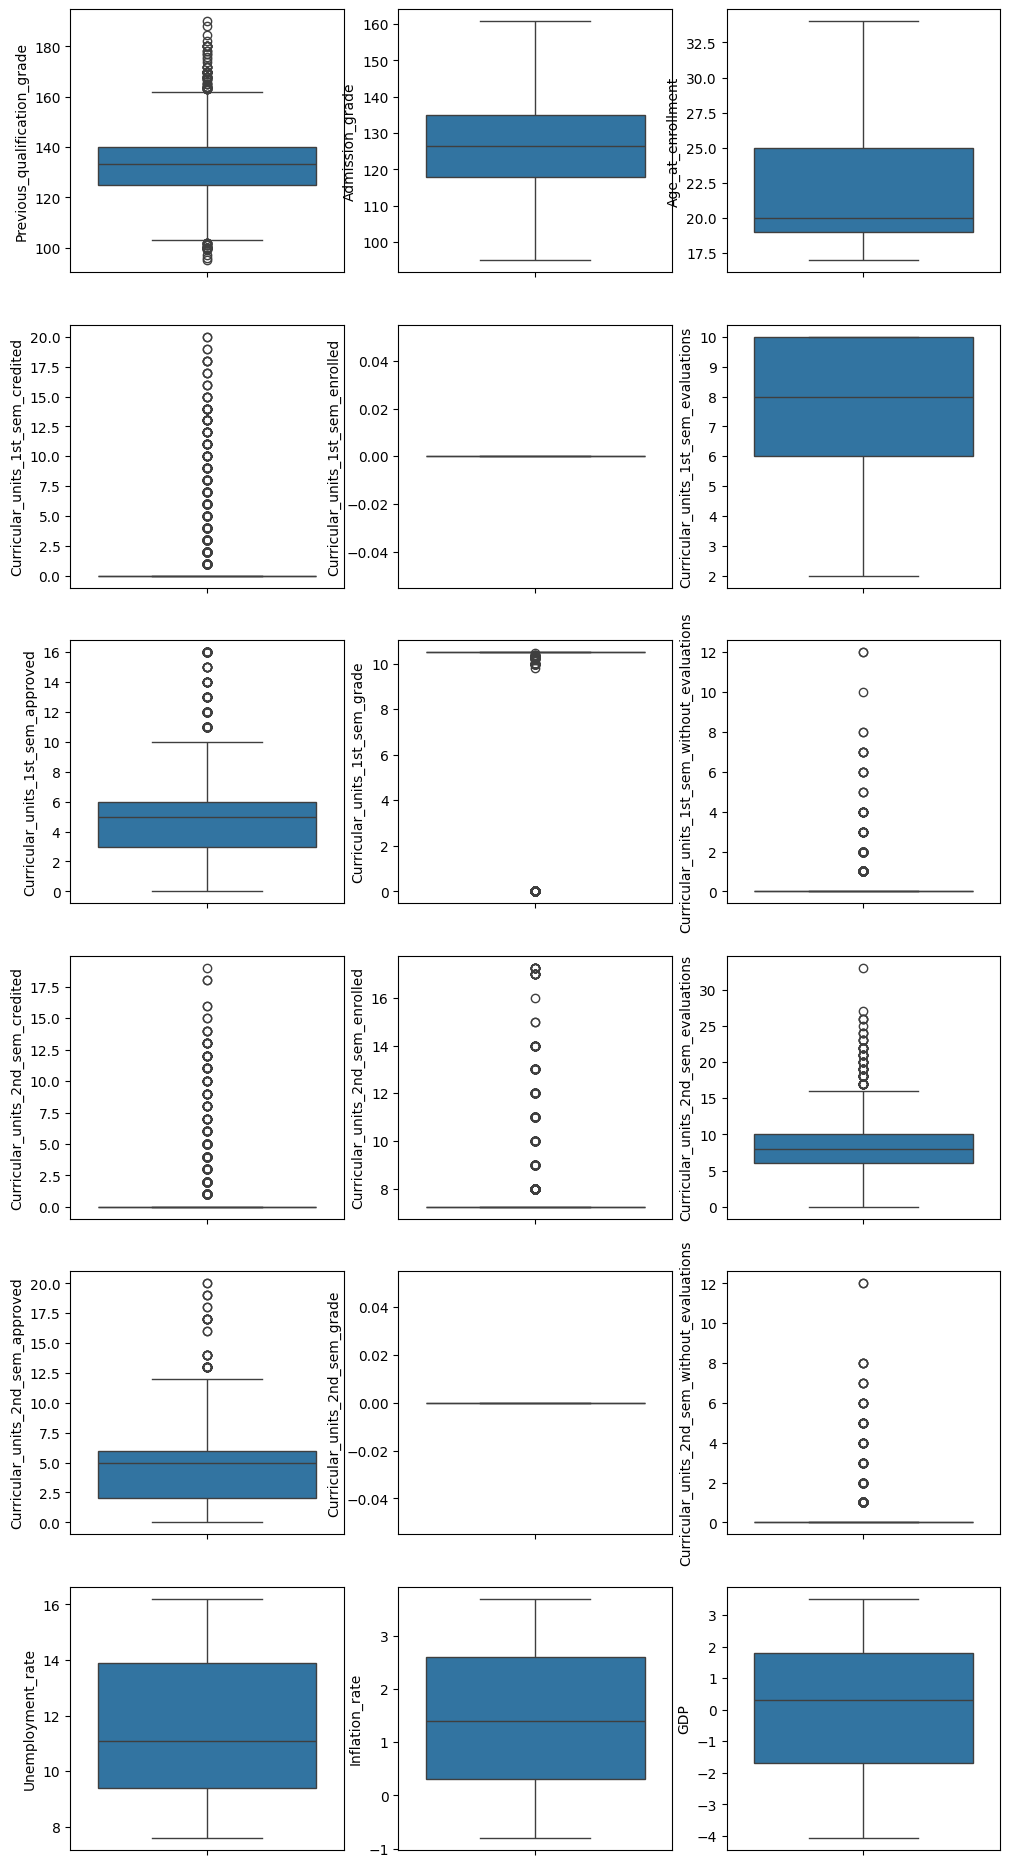

In [33]:
# Setelah outlier masuk batas atas dan batas bawah
plt.figure(figsize=(12, 28), facecolor='white')
plotnumber =1
for i in var_numerik:
    ax = plt.subplot(7,3,plotnumber)
    sns.boxplot(df_encoded[i])
    #plt.xlabel(i)
    plotnumber+=1
plt.show()

**Feature Scaling**

In [34]:
X = df_encoded.drop(['Status'], axis=1)
y = df_encoded['Status']

In [35]:
scaler = StandardScaler()
df_ss = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
df_scaled = pd.concat([df_ss, y.reset_index(drop=True)], axis=1)
df_scaled.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,-0.300686,-0.195864,2.436822,-2.006797,0.355850,-0.411566,-0.825034,-0.1472,-0.539761,-1.131470,0.051440,0.600018,0.011465,0.906297,-0.105556,-0.358302,0.393167,1.380697,-0.603447,-0.467234,-0.155777,-0.304517,0.0,-2.320099,-1.519412,-2.146912,-0.189871,-0.287686,-0.338467,-1.958586,-1.429014,0.0,-0.190148,-0.311312,0.121615,0.774119,0
1,-0.300686,-0.595856,-0.562471,0.250826,0.355850,-0.411566,2.045805,-0.1472,-1.365089,0.151106,-0.267205,0.097039,1.084515,0.906297,-0.105556,-0.358302,-2.543450,1.380697,-0.603447,-0.648128,-0.155777,-0.304517,0.0,-0.605007,0.392914,0.468647,-0.189871,-0.287686,-0.338467,-0.444817,0.468555,0.0,-0.190148,0.850919,-1.106070,0.353704,1
2,-0.300686,-0.995849,2.436822,-1.103748,0.355850,-0.411566,-0.825034,-0.1472,0.973342,0.899276,0.688729,0.600018,-0.165023,0.906297,-0.105556,-0.358302,-2.543450,1.380697,-0.603447,-0.648128,-0.155777,-0.304517,0.0,-2.320099,-1.519412,-2.146912,-0.189871,-0.287686,-0.338467,-1.958586,-1.429014,0.0,-0.190148,-0.311312,0.121615,0.774119,0
3,-0.300686,-0.195864,0.187353,1.153876,0.355850,-0.411566,-0.825034,-0.1472,1.110897,0.899276,0.051440,0.097039,-0.532119,0.906297,-0.105556,-0.358302,0.393167,-0.724272,-0.603447,-0.467234,-0.155777,-0.304517,0.0,0.252539,0.392914,0.468647,-0.189871,-0.287686,-0.338467,0.564362,0.152293,0.0,-0.190148,-0.836191,-1.467154,-1.376634,1
4,1.330837,0.804117,-0.562471,-1.555273,-2.810171,-0.411566,-2.487099,-0.1472,0.973342,1.006157,0.688729,0.600018,1.013920,-1.103391,-0.105556,-0.358302,0.393167,-0.724272,-0.603447,2.065280,-0.155777,-0.304517,0.0,0.681312,0.074193,0.468647,-0.189871,-0.287686,-0.338467,-0.444817,0.468555,0.0,-0.190148,0.850919,-1.106070,0.353704,1


In [36]:
df_scaled.shape

(3630, 37)

**Feature Correlation**

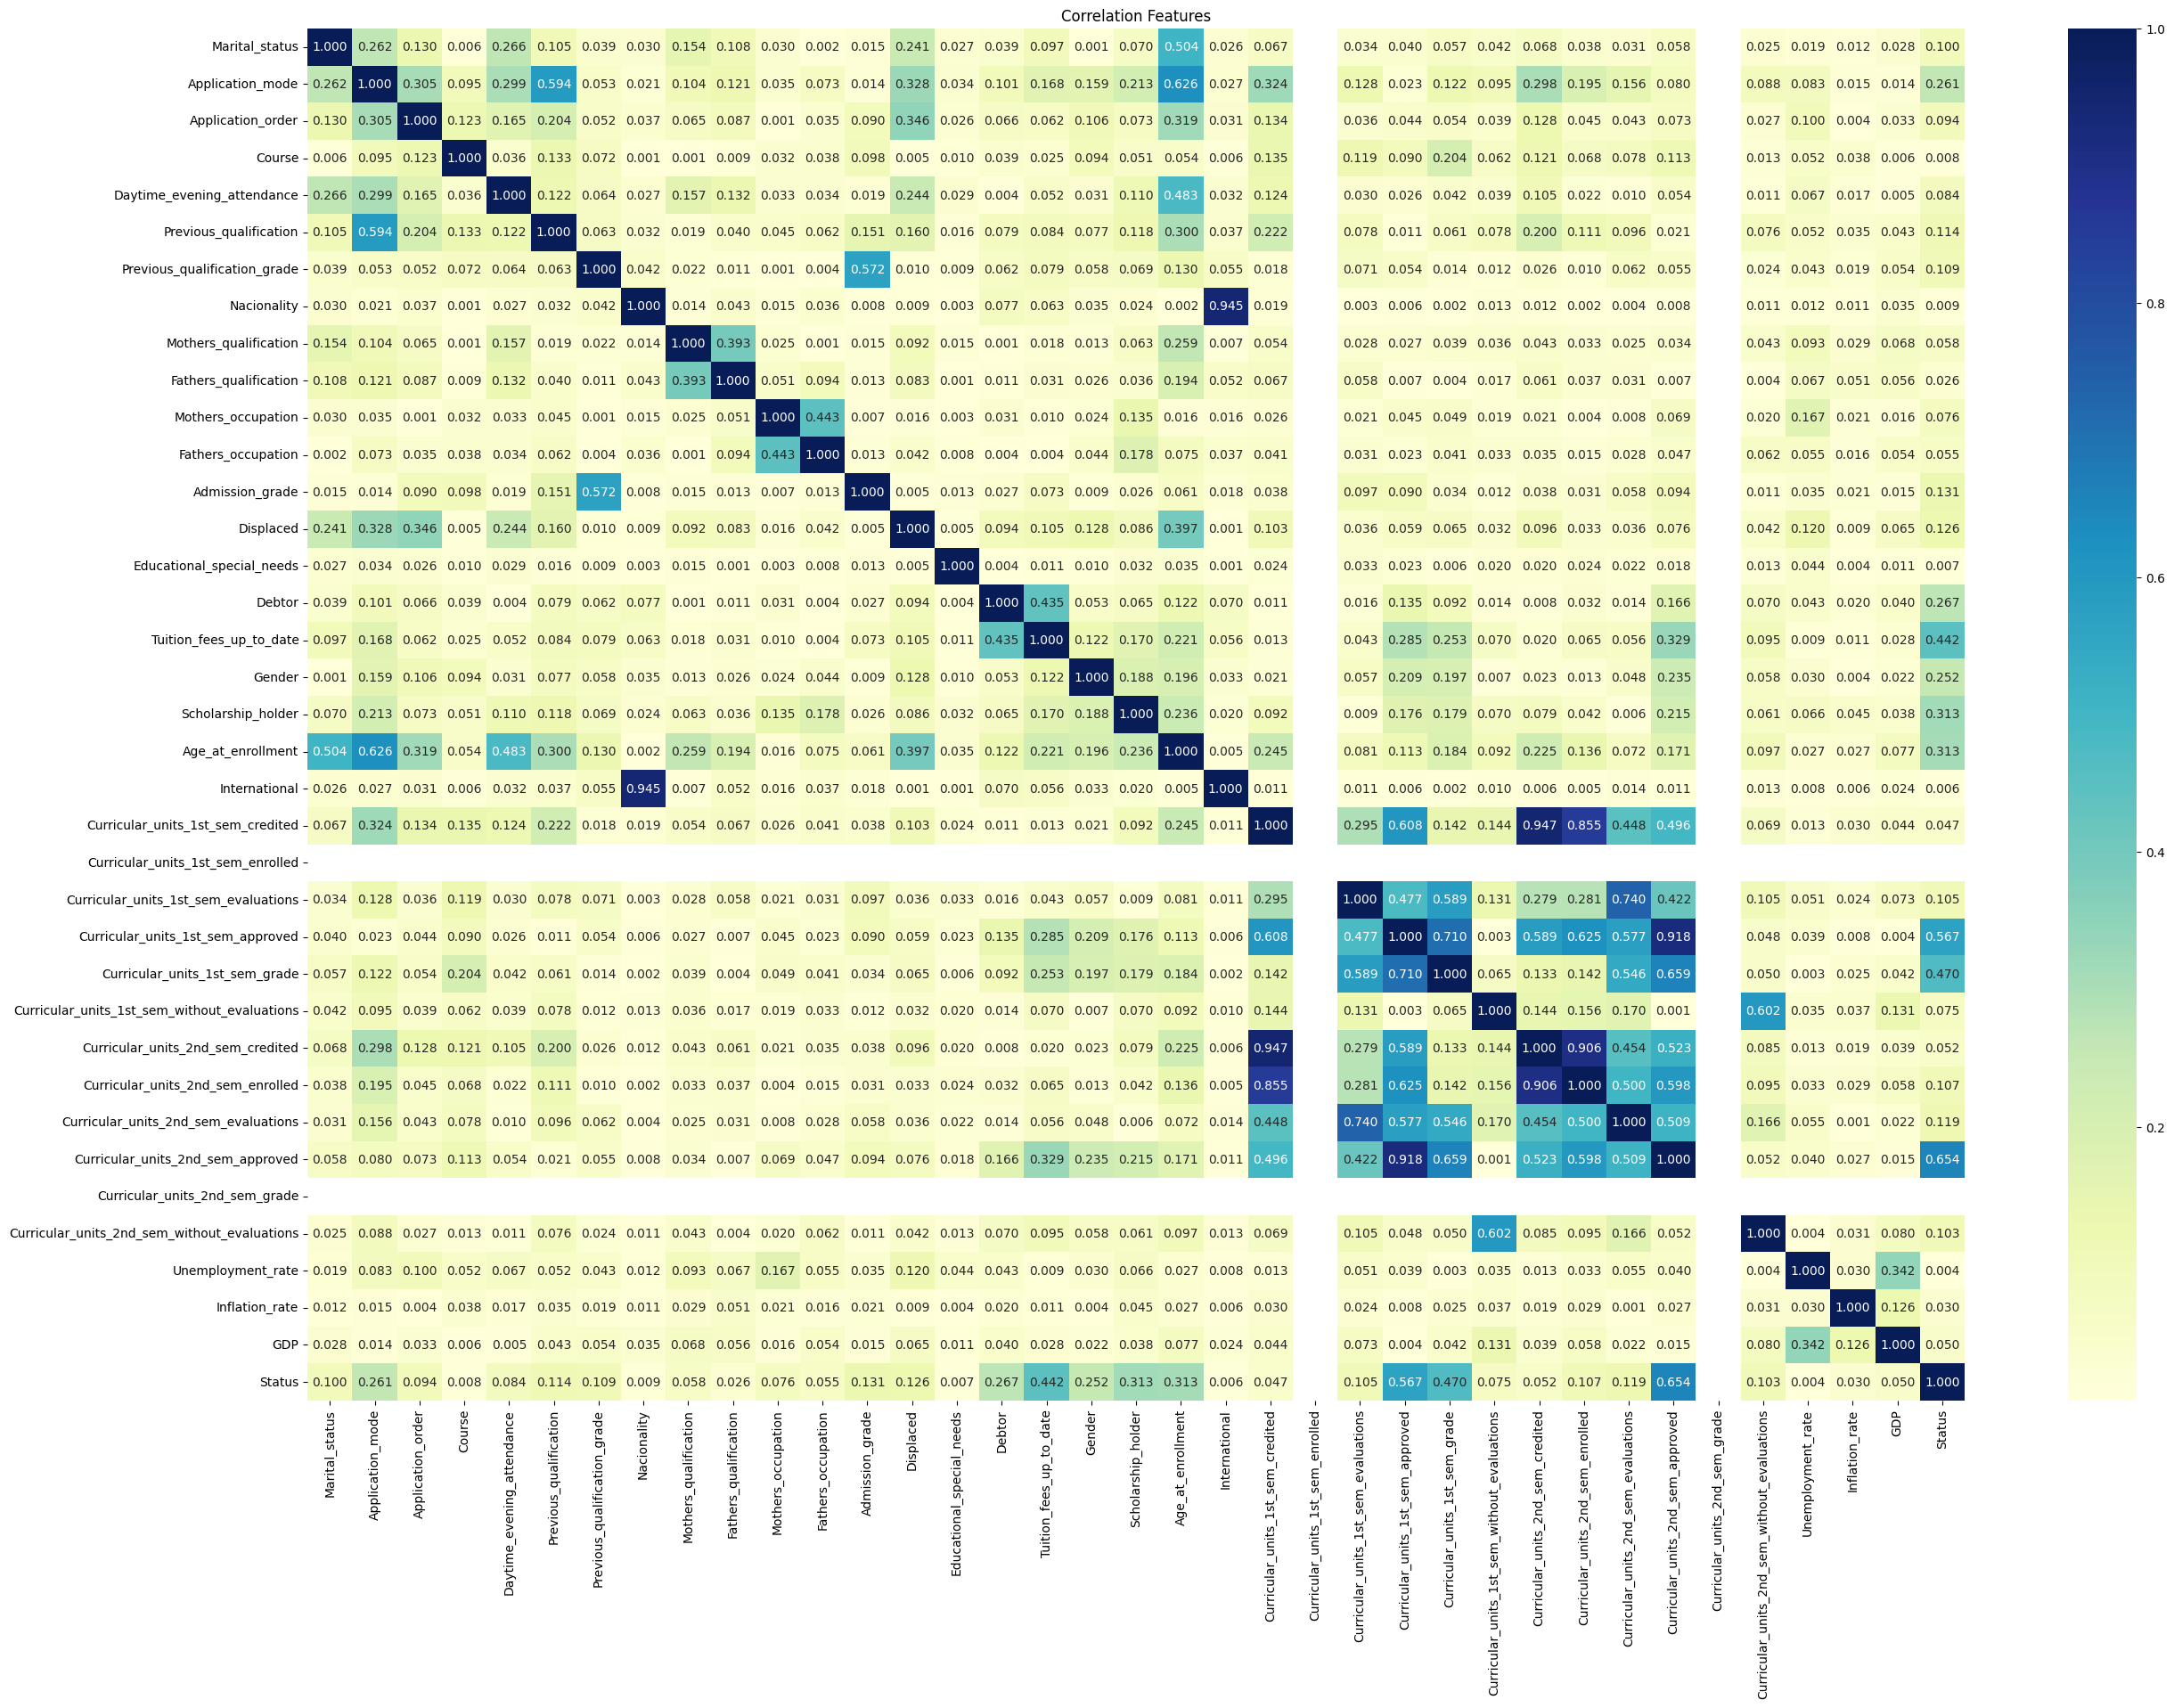

In [37]:
# Heatmap korelasi fitur dataframe yang telah dinormalisasi
plt.figure(figsize=(30, 20))
sns.heatmap(df_scaled.corr().abs(), cmap="YlGnBu", annot=True, fmt='.3f')
plt.title('Correlation Features')
plt.show()

In [38]:
def correlation(df, threshold):
  correlated_cols = set()
  corr_matrix = df_scaled.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        correlated_cols.add(colname)
  return correlated_cols

In [39]:
# Seleksi fitur-fitur multicollinearity, threshold 0.8
correlation(df_scaled, 0.8)

{'Curricular_units_2nd_sem_approved',
 'Curricular_units_2nd_sem_credited',
 'Curricular_units_2nd_sem_enrolled',
 'International'}

In [40]:
# Hapus fitur multicollinearity
df_scaled.drop(columns=['Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_credited', \
                        'Curricular_units_2nd_sem_enrolled', 'International'], axis=1, inplace=True)

In [41]:
# Mencari fitur yang relevan dengan label, threshold 0.1
cor = df_scaled.corr()
cor_target = abs(cor['Status'])
relevant_features = cor_target[cor_target > 0.1]
relevant_features

,Status
Marital_status,0.100479
Application_mode,0.261364
Previous_qualification,0.114244
Previous_qualification_grade,0.109464
Admission_grade,0.131422
Displaced,0.126113
Debtor,0.267207
Tuition_fees_up_to_date,0.442138
Gender,0.251955
Scholarship_holder,0.313018


In [42]:
new_df = df_scaled.loc[:, relevant_features.index]
new_df.head()

,Marital_status,Application_mode,Previous_qualification,Previous_qualification_grade,Admission_grade,Displaced,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_without_evaluations,Status
0,-0.300686,-0.195864,-0.411566,-0.825034,0.011465,0.906297,-0.358302,0.393167,1.380697,-0.603447,-0.467234,-2.320099,-1.519412,-2.146912,-1.958586,-0.190148,0
1,-0.300686,-0.595856,-0.411566,2.045805,1.084515,0.906297,-0.358302,-2.543450,1.380697,-0.603447,-0.648128,-0.605007,0.392914,0.468647,-0.444817,-0.190148,1
2,-0.300686,-0.995849,-0.411566,-0.825034,-0.165023,0.906297,-0.358302,-2.543450,1.380697,-0.603447,-0.648128,-2.320099,-1.519412,-2.146912,-1.958586,-0.190148,0
3,-0.300686,-0.195864,-0.411566,-0.825034,-0.532119,0.906297,-0.358302,0.393167,-0.724272,-0.603447,-0.467234,0.252539,0.392914,0.468647,0.564362,-0.190148,1
4,1.330837,0.804117,-0.411566,-2.487099,1.013920,-1.103391,-0.358302,0.393167,-0.724272,-0.603447,2.065280,0.681312,0.074193,0.468647,-0.444817,-0.190148,1


In [43]:
new_df.shape

(3630, 17)

## Modeling

In [44]:
X = new_df.drop(['Status'], axis=1)
y = new_df['Status']

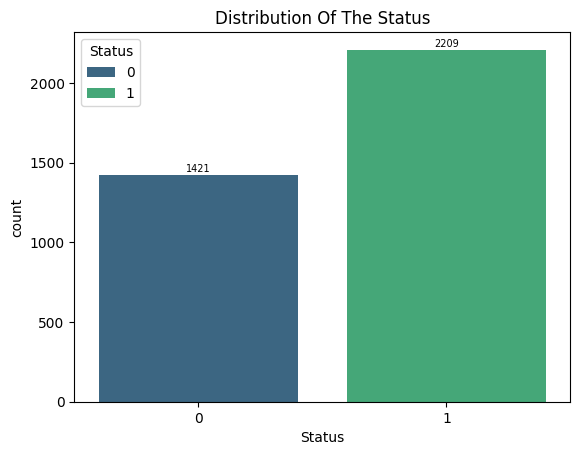

In [45]:
# Plotting countplot of Status
ax = sns.countplot(x=y, hue=y, palette='viridis')
for c in ax.containers:
    ax.bar_label(c, label_type='edge', padding=1, size=7)
ax.set_title("Distribution Of The Status")
plt.show()

*Keterangan label :*

    0 = Dropout
    1 = Graduate

**Splitting Data**

In [46]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    stratify = y,
    random_state = 0)

# Reset indeks dengan looping
for i in [X_train, X_test, y_train, y_test]:
    i.reset_index(drop=True, inplace=True)

# Melihat dimensi training set dan test set
print(X_train.shape, X_test.shape)

(2904, 16) (726, 16)


**Model Selection**

In [47]:
# Membuat object masing-masing model
classifier_used = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    GradientBoostingClassifier()
]

In [48]:
# Akurasi model dengan cross validation
features = X
labels = y
CV = 5
accu_list = []
f1_list = []
ModelName = []

for classifier in classifier_used:
    model_name = classifier.__class__.__name__
    accuracies = cross_val_score(classifier, features, labels, scoring = 'accuracy', cv=CV)
    f1score = cross_val_score(classifier, features, labels, scoring = 'f1_weighted', cv=CV)
    accu_list.append(accuracies.mean()*100)
    f1_list.append(f1score.mean()*100)
    ModelName.append(model_name)

model_acc_df = pd.DataFrame({'Model' : ModelName, 'Cross_Val_Accuracy' : accu_list})
model_acc_df = model_acc_df.sort_values('Cross_Val_Accuracy', ascending = False, ignore_index=True)
model_f1_df = pd.DataFrame({'Model' : ModelName, 'Cross_Val_F1_Score' : f1_list})
model_f1_df = model_f1_df.sort_values('Cross_Val_F1_Score', ascending = False, ignore_index=True)

In [49]:
# Akurasi
model_acc_df

,Model,Cross_Val_Accuracy
0,GradientBoostingClassifier,88.181818
1,SVC,87.906336
2,RandomForestClassifier,87.741047
3,LogisticRegression,87.410468
4,KNeighborsClassifier,84.820937
5,DecisionTreeClassifier,81.515152


In [50]:
# F1-Score
model_f1_df

,Model,Cross_Val_F1_Score
0,GradientBoostingClassifier,88.054410
1,SVC,87.711392
2,LogisticRegression,87.290155
3,RandomForestClassifier,87.213418
4,KNeighborsClassifier,84.489769
5,DecisionTreeClassifier,81.663146


Dataset ini tidak seimbang, di mana beberapa kelas jauh lebih dominan daripada yang lain, akurasi bisa menyesatkan. F1-Score adalah metrik evaluasi yang digunakan untuk menilai keseimbangan antara Precision dan Recall dalam sebuah model klasifikasi. Pada hasil cross validation di atas, the best model yang terpilih sama yaitu **GradientBoostingClassifier dengan nilai F1-Score maupun Accuracy besarnya sama yaitu 88%.**

*CONFUSSION MATRIX*

In [51]:
# Best Model yang dipilih adalah GradientBoostingClassifier
GB = GradientBoostingClassifier()

In [52]:
# Memprediksi X_train berdasarkan F1-Score
print('Per-Class Metrics for GradientBoostingClassifier')
GB.fit(X_train, y_train)
y_pred = GB.predict(X_train)
print("")
print(classification_report(y_train, y_pred, digits=4))

Per-Class Metrics for GradientBoostingClassifier

              precision    recall  f1-score   support

           0     0.9247    0.8311    0.8754      1137
           1     0.8980    0.9564    0.9263      1767

    accuracy                         0.9074      2904
   macro avg     0.9113    0.8938    0.9008      2904
weighted avg     0.9084    0.9074    0.9064      2904



In [53]:
# Memprediksi X_test berdasarkan F1-Score
print('Per-Class Metrics for GradientBoostingClassifier')
GB.fit(X_train, y_train)
y_pred = GB.predict(X_test)
print("")
print(classification_report(y_test, y_pred, digits=4))

Per-Class Metrics for GradientBoostingClassifier

              precision    recall  f1-score   support

           0     0.8915    0.8099    0.8487       284
           1     0.8846    0.9367    0.9099       442

    accuracy                         0.8871       726
   macro avg     0.8880    0.8733    0.8793       726
weighted avg     0.8873    0.8871    0.8860       726



<Axes: >

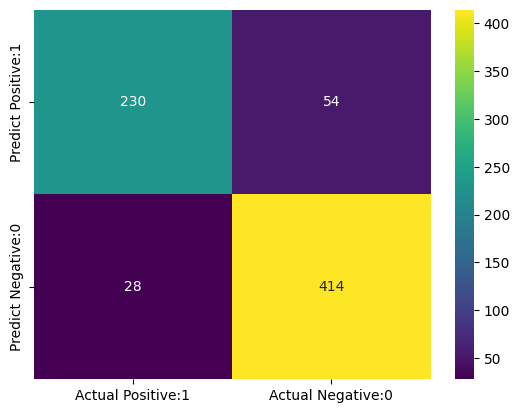

In [54]:
# Visualisasi confusion matrix prediksi X_test
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data = cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='viridis')

**Hyperparameter Tuning**

In [55]:
# Hyperparameter tuning regresi GBoosting
param_gb = {'loss': ['log_loss', 'deviance', 'exponential'],
            'learning_rate': [0.1, 0.01, 0.5, 1, 1.1],
            'n_estimators': [10, 30, 50, 70]
            }

In [56]:
akurasi_tuning = []
akurasi_tuning_test = []
best_score = []
best_param = []

In [57]:
# Akurasi model dengan GridSearchCV

model_grid_cv = GridSearchCV(
        GB,
        param_gb,
        cv=5,
        scoring='accuracy',   # nilai accuracy untuk penentuan parameter scoring terbaik
        verbose=1,    # menampilkan langkah-langkah pemrosesan untuk setiap eksekusi
        n_jobs=-1
        )

# Fitting ke training set
model_grid_cv.fit(X_train, y_train)

# Mencoba memprediksi training dan test set setelah fitting di training set, kemudian dikemas dalam format DataFrame
pred_train = pd.DataFrame(model_grid_cv.predict(X_train), columns=['Status'])
pred_test = pd.DataFrame(model_grid_cv.predict(X_test), columns=['Status'])

# Mencatat skor akurasi training dan test set
akurasi_tuning.append(accuracy_score(y_train, pred_train))
akurasi_tuning_test.append(accuracy_score(y_test, pred_test))

# Mencatat skor akurasi terbaik kombinasi parameter
best_score.append(model_grid_cv.best_score_)

# Mencatat parameter terbaik di setiap model
best_param.append(model_grid_cv.best_params_)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [58]:
f1_tuning = []
f1_tuning_test = []
f1_best_score = []
f1_best_param = []

In [59]:
# F1-Score model dengan GridSearchCV

model_grid_cv2 = GridSearchCV(
        GB,
        param_gb,
        cv=5,
        scoring='f1_weighted',   # nilai f1_weighted untuk penentuan parameter scoring terbaik
        verbose=1,    # menampilkan langkah-langkah pemrosesan untuk setiap eksekusi
        n_jobs=-1
        )

# Fitting ke training set
model_grid_cv2.fit(X_train, y_train)

# Mencoba memprediksi training dan test set setelah fitting di training set, kemudian dikemas dalam format DataFrame
f1_pred_train = pd.DataFrame(model_grid_cv2.predict(X_train), columns=['Status'])
f1_pred_test = pd.DataFrame(model_grid_cv2.predict(X_test), columns=['Status'])

# Mencatat F1-Score training dan test set
f1_tuning.append(f1_score(y_train, f1_pred_train, average='weighted'))
f1_tuning_test.append(f1_score(y_test, f1_pred_test, average='weighted'))

# Mencatat F1-Score terbaik kombinasi parameter
f1_best_score.append(model_grid_cv2.best_score_)

# Mencatat parameter terbaik di setiap model
f1_best_param.append(model_grid_cv2.best_params_)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


## Evaluation

*ACCURACY*

In [60]:
# Accuracy Score
pd.set_option('display.max_colwidth', None)
grid_akurasi = pd.DataFrame({'Model': GB.__class__.__name__, 'Akurasi Train': akurasi_tuning, 'Akurasi Test': akurasi_tuning_test})
grid_akurasi['Akurasi Train'] = grid_akurasi['Akurasi Train']*100
grid_akurasi['Akurasi Test'] = grid_akurasi['Akurasi Test']*100
grid_akurasi_urut = grid_akurasi.sort_values(by='Akurasi Test', ascending=False,  ignore_index=True)
grid_akurasi_urut

,Model,Akurasi Train,Akurasi Test
0,GradientBoostingClassifier,89.118457,88.705234


In [61]:
# best_score_
grid_score = pd.DataFrame({'Model':GB.__class__.__name__, 'Score':best_score})
grid_score['Score'] = grid_score['Score']*100
grid_score_urut = grid_score.sort_values(by='Score', ascending=False,  ignore_index=True)
grid_score_urut

,Model,Score
0,GradientBoostingClassifier,88.05116


In [62]:
# Parameter terbaik dari model terbaik
grid_param = pd.DataFrame({'Model':GB.__class__.__name__, 'Param':best_param})
grid_param

,Model,Param
0,GradientBoostingClassifier,"{'learning_rate': 0.1, 'loss': 'log_loss', 'n_estimators': 50}"


*F1-SCORE*

In [63]:
# F1-Score
grid_f1 = pd.DataFrame({'Model': GB.__class__.__name__, 'F1 Score Train': f1_tuning, 'F1 Score Test': f1_tuning_test})
grid_f1['F1 Score Train'] = grid_f1['F1 Score Train']*100
grid_f1['F1 Score Test'] = grid_f1['F1 Score Test']*100
grid_f1_urut = grid_f1.sort_values(by='F1 Score Test', ascending=False,  ignore_index=True)
grid_f1_urut

,Model,F1 Score Train,F1 Score Test
0,GradientBoostingClassifier,89.277418,88.59568


In [64]:
# best_score_
f1_best_score = pd.DataFrame({'Model':GB.__class__.__name__, 'F1 Score':f1_best_score})
f1_best_score['F1 Score'] = f1_best_score['F1 Score']*100
f1_best_score_urut = f1_best_score.sort_values(by='F1 Score', ascending=False,  ignore_index=True)
f1_best_score_urut

,Model,F1 Score
0,GradientBoostingClassifier,87.932637


In [65]:
# Parameter terbaik dari model terbaik
f1_param = pd.DataFrame({'Model':GB.__class__.__name__, 'F1 Param':f1_best_param})
f1_param

,Model,F1 Param
0,GradientBoostingClassifier,"{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 70}"


**Insight**

Secara umum model yang diuji tidak mengalami overfitting, perbedaan score prediksi data training dan data test hanya sebesar 1% sebelum maupun setelah melakukan tuning. Dan diketahui bahwa model tanpa hyperparameter tuning sudah cukup baik untuk diimplementasikan.

Best score prediksi sebelum melakukan hyperparameter tuning:

    Accuracy: 88,71%
    F1-Score: 88,60%

Best score prediksi setelah melakukan hyperparameter tuning:

    Accuracy: 88,05%
    F1-Score: 87,93%

## Feature Importance

In [66]:
# Built-in feature importance dari model tanpa hyperparameter
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [67]:
# Melihat feature scores
feature_scores = pd.Series(gb.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

,0
Curricular_units_1st_sem_approved,0.683572
Tuition_fees_up_to_date,0.118787
Curricular_units_2nd_sem_evaluations,0.045198
Age_at_enrollment,0.028632
Scholarship_holder,0.028294
Application_mode,0.023384
Admission_grade,0.017981
Previous_qualification_grade,0.013033
Debtor,0.013011
Curricular_units_1st_sem_evaluations,0.010586


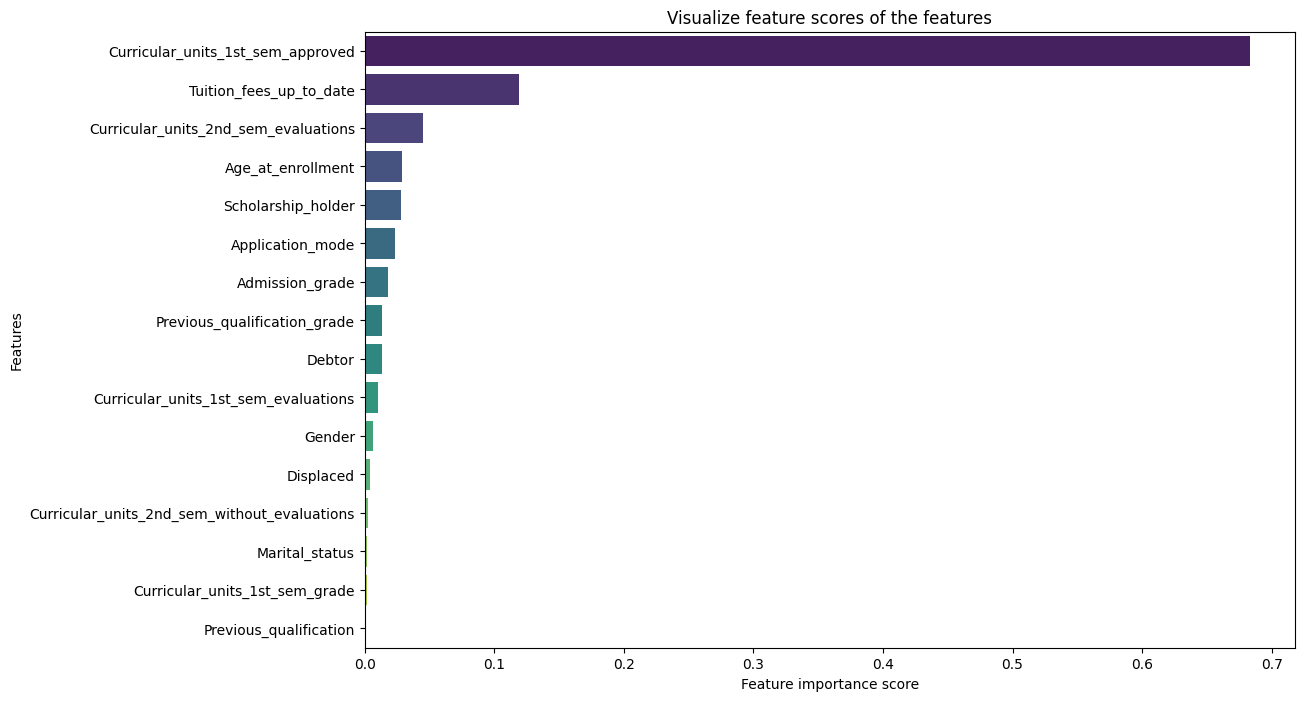

In [68]:
# Creating a seaborn bar plot
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(x = feature_scores, y = feature_scores.index, palette='viridis')
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

**Insight**

Top 8 fitur terpenting yang mempengaruhi model ini antara lain:

    1. Curricular_units_1st_sem_approved
    2. Tuition_fees_up_to_date
    3. Curricular_units_2nd_sem_evaluations
    4. Age_at_enrollment
    5. Scholarship_holder
    6. Application_mode
    7. Admission_grade
    8. Previous_qualification_grade


## Mengekspor Dataset Prediksi

In [69]:
# Membuat dataset prediksi dengan menggunakan top 8 fitur
prediksi_final = predict_df.loc[:, ['Curricular_units_1st_sem_approved', 'Tuition_fees_up_to_date', \
                                    'Curricular_units_2nd_sem_evaluations', 'Age_at_enrollment', 'Scholarship_holder', \
                                    'Application_mode', 'Admission_grade', 'Previous_qualification_grade']]
prediksi_final.head()

,Curricular_units_1st_sem_approved,Tuition_fees_up_to_date,Curricular_units_2nd_sem_evaluations,Age_at_enrollment,Scholarship_holder,Application_mode,Admission_grade,Previous_qualification_grade
16,1,1,14,18,0,18,137.4,137.0
19,6,1,8,18,0,1,124.6,140.0
21,7,1,9,20,0,18,121.8,127.0
25,5,1,12,18,1,1,157.0,151.0
27,5,1,7,18,0,1,131.0,138.0


In [70]:
# Mengekspor sekaligus mendownload dataset prediksi dalam format .csv
from google.colab import files
prediksi_final.to_csv('studentperformance_pred.csv', header=True, index=False)
files.download('studentperformance_pred.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Menyimpan Model dan Memprediksi Status

In [71]:
# Membuat dataset baru dengan menggunakan top 8 fitur
df_final = df.loc[:, ['Curricular_units_1st_sem_approved', 'Tuition_fees_up_to_date', \
                      'Curricular_units_2nd_sem_evaluations', 'Age_at_enrollment', 'Scholarship_holder', \
                      'Application_mode', 'Admission_grade', 'Previous_qualification_grade', 'Status']]
df_final.head()

,Curricular_units_1st_sem_approved,Tuition_fees_up_to_date,Curricular_units_2nd_sem_evaluations,Age_at_enrollment,Scholarship_holder,Application_mode,Admission_grade,Previous_qualification_grade,Status
0,0,1,0,20,0,4,127.3,122.0,0
1,6,0,6,19,0,2,142.5,160.0,1
2,0,0,0,19,0,0,124.8,122.0,0
3,6,1,10,20,0,4,119.6,122.0,1
4,5,1,6,45,0,9,141.5,100.0,1


In [72]:
df_final.shape

(3630, 9)

In [73]:
df_final.dtypes

,0
Curricular_units_1st_sem_approved,int64
Tuition_fees_up_to_date,object
Curricular_units_2nd_sem_evaluations,int64
Age_at_enrollment,int64
Scholarship_holder,object
Application_mode,int64
Admission_grade,float64
Previous_qualification_grade,float64
Status,int64


In [74]:
# Membagi kolom menjadi kolom numerik dan kategori
var_kategori = [var for var in df_final.columns if df_final[var].dtype=='O' and var not in ['Status']]
var_numerik = [var for var in df_final.columns if df_final[var].dtype!='O' and var not in ['Status']]

# Melihat pemisahan variabel
print("Kategori : ",var_kategori)
print("Numerik : ",var_numerik)

Kategori :  ['Tuition_fees_up_to_date', 'Scholarship_holder']
Numerik :  ['Curricular_units_1st_sem_approved', 'Curricular_units_2nd_sem_evaluations', 'Age_at_enrollment', 'Application_mode', 'Admission_grade', 'Previous_qualification_grade']


In [75]:
# Membuat Pipeline untuk preprocessing
preprocessor_numerik = Pipeline([
    ('imputasi', SimpleImputer(strategy='median')),
    ('scaling', StandardScaler())
])

preprocessor_kategori = Pipeline([
    ('imputasi', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoding', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

# Menggabungkan kedua pipeline di atas
preprocessor = ColumnTransformer([
    ('preprocessing numerik', preprocessor_numerik, var_numerik),
    ('preprocessing kategori', preprocessor_kategori, var_kategori)
])

In [76]:
# Pipeline model RandomForestClassifier
pipe_gb = Pipeline([
    ('preprocessing', preprocessor),
    ('gb', gb)
])

In [77]:
# Membagi X dan y dari dataset diatas
X_new = df_final.drop(['Status'], axis=1)
y_new = df_final['Status']

In [78]:
pipe_gb.fit(X_new, y_new)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('preprocessing numerik',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Curricular_units_1st_sem_approved',
                                                   'Curricular_units_2nd_sem_evaluations',
                                                   'Age_at_enrollment',
                                                   'Application_mode',
                                                   'Admission_grade',
                                                   'Previous_qualification_grade']),
                                                 ('preprocessing kategori',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Tuition_fees_up_to_date',
                                                   'Scholarship_holder'])])),
                ('gb', GradientBoostingClassifier(random_state=0))])

In [79]:
# Mendefinisikan X_pred
X_pred = prediksi_final

In [80]:
import pickle

# Menyimpan model dengan nama 'gb_best_model.pkl'
pickle.dump(pipe_gb, open('gb_best_model.pkl', 'wb'))

# Load lagi model yang sudah disimpan dan buka sebagai 'best_model'
best_model = pickle.load(open('gb_best_model.pkl', 'rb'))

# Mencoba melakukan prediksi X_pred
result = best_model.predict(X_pred)

# Melihat hasil prediksi
prediksi_final['Status'] = result
prediksi_final['Status'].value_counts()

,count
Status,
1,453
0,341


In [81]:
# Membuat dictionary untuk remapping nilai label Status
map_status = {0: 'Dropout', 1: 'Graduate'}

# Remapping nilai menggunakan replace()
df_final['Status'] = df_final['Status'].replace(map_status)
prediksi_final['Status'] = prediksi_final['Status'].replace(map_status)

dataset_final = pd.concat([df_final, prediksi_final], axis=0)
dataset_final = dataset_final.sort_index()
dataset_final.head(20)

,Curricular_units_1st_sem_approved,Tuition_fees_up_to_date,Curricular_units_2nd_sem_evaluations,Age_at_enrollment,Scholarship_holder,Application_mode,Admission_grade,Previous_qualification_grade,Status
0,0,1,0,20,0,4,127.3,122.0,Dropout
1,6,0,6,19,0,2,142.5,160.0,Graduate
2,0,0,0,19,0,0,124.8,122.0,Dropout
3,6,1,10,20,0,4,119.6,122.0,Graduate
4,5,1,6,45,0,9,141.5,100.0,Graduate
5,5,1,17,50,0,9,114.8,133.1,Graduate
6,7,1,8,18,1,0,128.4,142.0,Graduate
7,0,0,5,22,0,5,113.1,119.0,Dropout
8,6,1,7,21,1,0,129.3,137.0,Graduate
9,5,0,14,18,0,0,123.0,138.0,Dropout


In [82]:
dataset_final['Status'].value_counts()

,count
Status,
Graduate,2662
Dropout,1762


In [83]:
dataset_final.shape

(4424, 9)

In [84]:
# Memasukkan hasil prediksi ke dalam dataset asli
dataset.drop(columns='Status', axis=1, inplace=True)
dataset['Status'] = dataset_final['Status']
dataset.head(20)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,9,7,114.8,0,0,1,1,1,0,50,0,0,5,10,5,11.857143,0,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,7,10,128.4,1,0,0,1,0,1,18,0,0,7,9,7,13.300000,0,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,9,9,113.1,1,0,0,0,1,0,22,0,0,5,5,0,0.000000,0,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,9,9,129.3,0,0,0,1,0,1,21,1,0,6,8,6,13.875000,0,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,4,7,123.0,1,0,1,0,0,0,18,0,0,6,9,5,11.400000,0,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [85]:
# Mengekspor sekaligus mendownload final dataset dalam format .csv
from google.colab import files
dataset.to_csv('studentperformance_final.csv', header=True, index=True)
files.download('studentperformance_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>